In [1]:
#Installing Yahoo Finance Library
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Downloading all modules at once
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si

In [3]:
#Downloading Bitcoin data for one year ending 1st March 2022
initial_data = yf.download("BTC-USD", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
#To check the data head which is by default 5 rows
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451
2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112
2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,47530897720
2021-03-03,48415.816406,52535.136719,48274.320312,50538.242188,50538.242188,53220811975
2021-03-04,50522.304688,51735.089844,47656.929688,48561.167969,48561.167969,52343816680


In [5]:
#To check the data tail which is by default 5 rows
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093
2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,39214.218750,26545599159
2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,39105.148438,17467554129
2022-02-27,39098.699219,39778.941406,37268.976562,37709.785156,37709.785156,23450127612
2022-02-28,37706.000000,43760.457031,37518.214844,43193.234375,43193.234375,35690014104


In [6]:
#The initial data 'row' for adjusted close is now assigned as 'data' filtered for values in 'Adj close' column only
data = initial_data['Adj Close']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BDD93BEB8>],
      dtype=object)

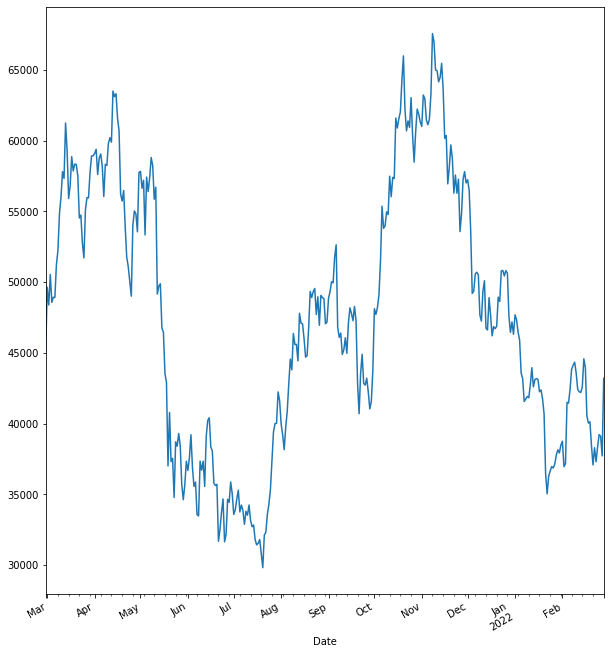

In [7]:
#Movement of BTC-USD from March 2021 to March 2022
data.plot(figsize=(10,12), subplots=True)

In [8]:
#Statistical description of BTC Price data over a span of one year
data.describe().round(2)

count      366.00
mean     47544.65
std       9293.17
min      29807.35
25%      39804.35
50%      47131.82
75%      56046.97
max      67566.83
Name: Adj Close, dtype: float64

In [9]:
#Change in BTC_USD price over 20 days .i.e. T+1(adjusted close)-T(adjusted close) that is for each day
data.diff().head(20)

Date
2021-02-28            NaN
2021-03-01    4493.472656
2021-03-02   -1252.253906
2021-03-03    2159.253906
2021-03-04   -1977.074219
2021-03-05     366.136719
2021-03-06     -14.921875
2021-03-07    2294.308594
2021-03-08    1039.832031
2021-03-09    2577.593750
2021-03-10    1184.433594
2021-03-11    1796.570312
2021-03-12    -473.031250
2021-03-13    3910.996094
2021-03-14   -1940.769531
2021-03-15   -3395.117188
2021-03-16     897.703125
2021-03-17    2065.992188
2021-03-18   -1011.972656
2021-03-19     487.730469
Name: Adj Close, dtype: float64

In [10]:
#Statistical description of price change of BTC-USD over one year
data.diff().describe().round(2)

count     365.00
mean       -5.33
std      1802.28
min     -7554.04
25%     -1010.48
50%        12.52
75%       994.25
max      5483.45
Name: Adj Close, dtype: float64

In [11]:
#Daily percentage change in BTC-USD price for the first 5 days starting 1 March 2021
data.pct_change().round(4).head()

Date
2021-02-28       NaN
2021-03-01    0.0996
2021-03-02   -0.0252
2021-03-03    0.0446
2021-03-04   -0.0391
Name: Adj Close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BDECB34E0>],
      dtype=object)

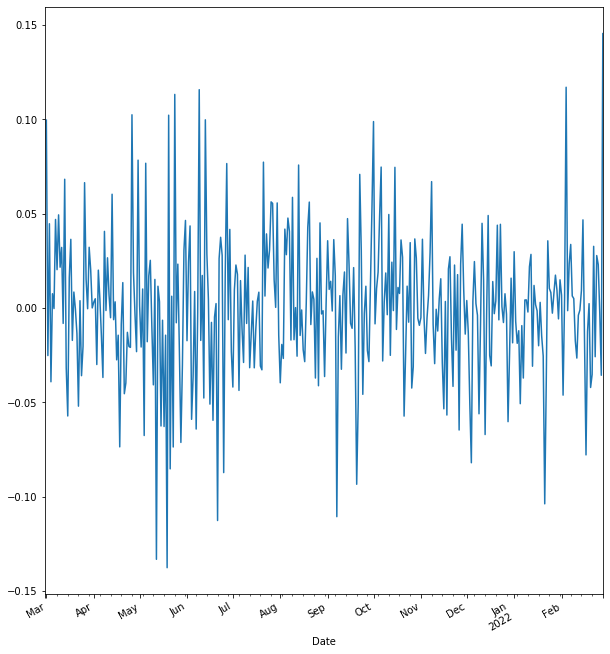

In [12]:
#Plotting percentage change in daily BTC price over time
data.pct_change().plot(figsize=(10,12), subplots=True)

In [13]:
#Statistical Description of percentage values over a span of one year
data.pct_change().describe().round(2)

count    365.00
mean       0.00
std        0.04
min       -0.14
25%       -0.02
50%        0.00
75%        0.02
max        0.15
Name: Adj Close, dtype: float64

In [14]:
#Data 'logged' for the changes in price
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2021-02-28       NaN
2021-03-01    0.0949
2021-03-02   -0.0256
2021-03-03    0.0437
2021-03-04   -0.0399
Name: Adj Close, dtype: float64

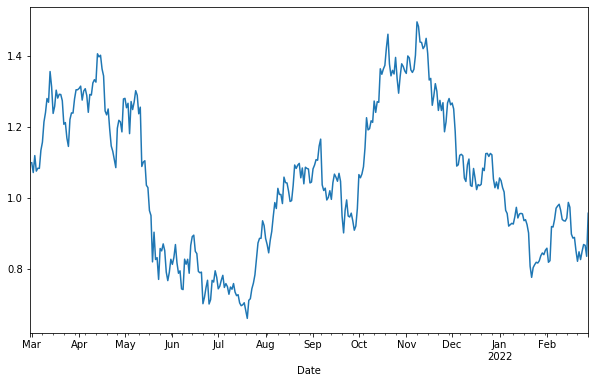

In [15]:
#Plotting 'logged' data cumulative sum 
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [16]:
#Resampling data weekly adj close 
data.resample('1w', label='right').last().head()

Date
2021-02-28    45137.769531
2021-03-07    51206.691406
2021-03-14    59302.316406
2021-03-21    57523.421875
2021-03-28    55950.746094
Freq: W-SUN, Name: Adj Close, dtype: float64

In [17]:
#Resampling data daily adj close
data.resample('1d', label='right').last().head()

Date
2021-03-01    45137.769531
2021-03-02    49631.242188
2021-03-03    48378.988281
2021-03-04    50538.242188
2021-03-05    48561.167969
Freq: D, Name: Adj Close, dtype: float64

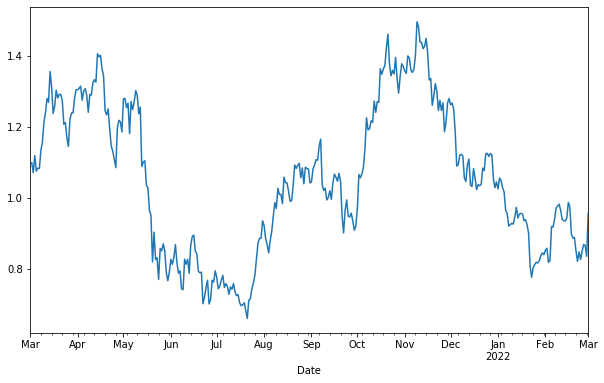

In [18]:
#Plotting daily cumulative sum percentage change
rets.cumsum().apply(np.exp). resample('1d', label='right').last().plot(figsize=(10, 6))

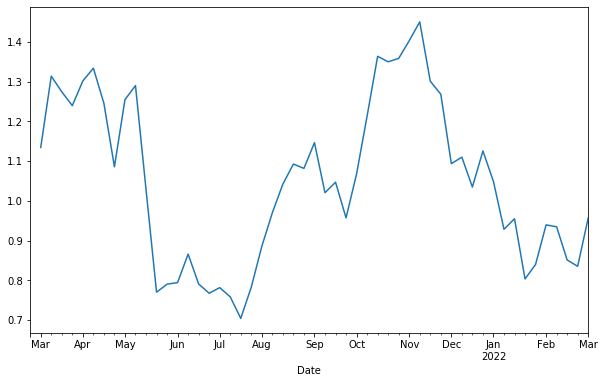

In [19]:
#Plotting weekly cumulative sum percentage change
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

In [20]:
#Dropping missing values from data frame
BTC_USD_data = pd.DataFrame(data).dropna()
BTC_USD_data.tail()

,Adj Close
Date,
2022-02-24,38332.609375
2022-02-25,39214.218750
2022-02-26,39105.148438
2022-02-27,37709.785156
2022-02-28,43193.234375


# Volatility

In [22]:
#Defining data frame 
df = (BTC_USD_data)
df.head()

,Adj Close
Date,
2021-02-28,45137.769531
2021-03-01,49631.242188
2021-03-02,48378.988281
2021-03-03,50538.242188
2021-03-04,48561.167969


In [23]:
#Calculating Volatility of BTC-USD- Calculating normal returns
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.09955017057586457,
 -0.025231161886280364,
 0.044632059969861984,
 -0.039120359814156826,
 0.007539701660092189]

In [24]:
#Calculating Volatility of BTC-USD -log returns are calculated
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.09490116032713884,
 -0.025554925208490772,
 0.043664727693901485,
 -0.0399061221991278,
 0.007511420176535919]

In [25]:
#Calculated annualized normal return and annualized volatility
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.23220233 and its annulized volatility is 0.74394565


In [26]:
#Calculated annualized log return and annualized volatility
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is -0.04403549 and its annulized volatility is 0.74486347


# Financial Derivative 3 month european call option

# # Binomial Method for valuation

In [35]:
# Making a financial derivative - a 3 month European Call Option and  expiring in July 2021
S0 = 49186.89       # spot stock price on 15th April 2021
K = 55000            # strike
T = 0.25                 # maturity 
r = 0.005            # risk free rate (3 month T bill rate UK)
sig = 0.74486347           # diffusion coefficient or volatility
N = 1            # number of periods or number of time steps  
payoff = "call"      # payoff 

In [36]:
#Developing and feeding the formula for binomial
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [37]:
#Developing and feeding the formula for binomial
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [38]:
#Predicted up and down value of BTC-USD for one interval (after 3 months)
S

array([[49186.89      , 71382.93674167],
       [    0.        , 33892.55553645]])

In [39]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4095945686779039

In [41]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)

V

array([[    0.        , 16382.93674167],
       [    0.        ,     0.        ]])

In [42]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 6701.97919628, 16382.93674167],
       [    0.        ,     0.        ]])

In [43]:
#Option value using Binomial valuation model
print('European ' + payoff, str( V[0,0]))

European call 6701.979196284814


# Black Scholes for Option Valuation

In [44]:
#Applying Black Scholes for option valuation
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [45]:
#Option value using Black Scholes model
euro_option_bs(49186.89, 55000, 0.25, 0.005,0.745, 'call')

5151.016954040089

In [46]:
S = np.linspace(10000,70000,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 55000, 0.25, 0.005, 0.69, 'call')

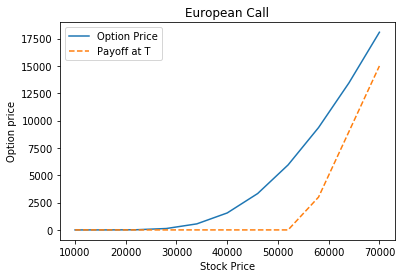

In [47]:
#Option payoff figure
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-55000,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Option price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# GREEKS

# DELTA

In [48]:
#Delta inputs for feeding the formula
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [49]:
delta(49186.89, 55000, 0.25, 0.005, 0, 0.745, 'call')

0.4560951114332051

In [51]:
S = np.linspace(10000,70000,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 55000, 0.25, 0.005, 0, 0.745, 'call')

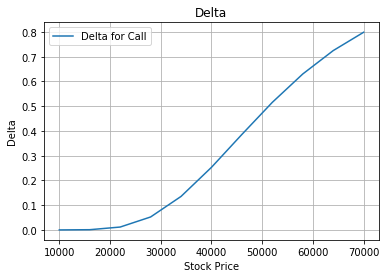

In [52]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# Gamma

In [82]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [83]:
gamma(49186.89, 55000, 0.25, 0.005, 0, 0.745, 'call')

2.1641817254139357e-05

In [84]:
S = np.linspace(10000,70000,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 55000, 0.25, 0.005, 0, 0.745, 'call')

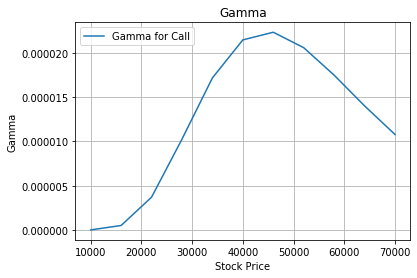

In [85]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

# Theta

In [81]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [74]:
theta(49186.89, 55000 , 0.25, 0.005, 0, 0.745, 'call')

14616.728527071378

In [92]:
T = np.linspace(2/12,0.25,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(49186.89, 55000, T[i], 0.005, 0, 0.745, 'call')

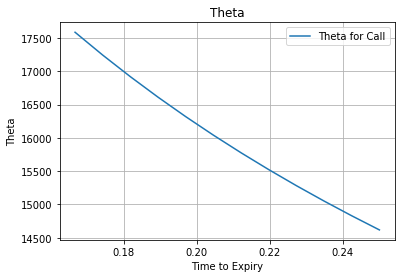

In [93]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

# Rho

In [77]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
  
    
    return rho

In [78]:
rho(49186.89, 55000, 1, 0.005, 0, 0.745, 'call')

16583.066954071117

In [100]:
r = np.linspace(2/12,0.5,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(49186.89, 55000, 0.25, r[i], 0, 0.745, 'call')

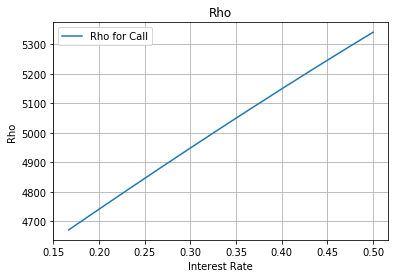

In [101]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

# Vega

In [88]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [89]:
vega(49186.89, 55000, 0.25, 0.005, 0, 0.745, 'call')

9751.888665411787

In [98]:
vol = np.linspace(2/12,1,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(48196, 55000, 0.25, 0.005, 0, vol[i], 'call')

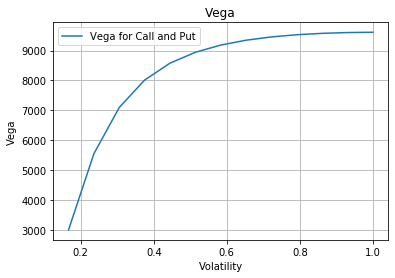

In [99]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])